## Random Forest - Credit Default Prediction

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

<hr>

### Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
fraud = pd.read_csv("D:\PYTHON_MAIN_COURSE(IIIT-Bnglr)\COURSE-4-ML_PRED-ANALYSIS-2\DECISION_TREES\\random_forest\\credit-card-default.csv")

fraud.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Let's understand the type of columns
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

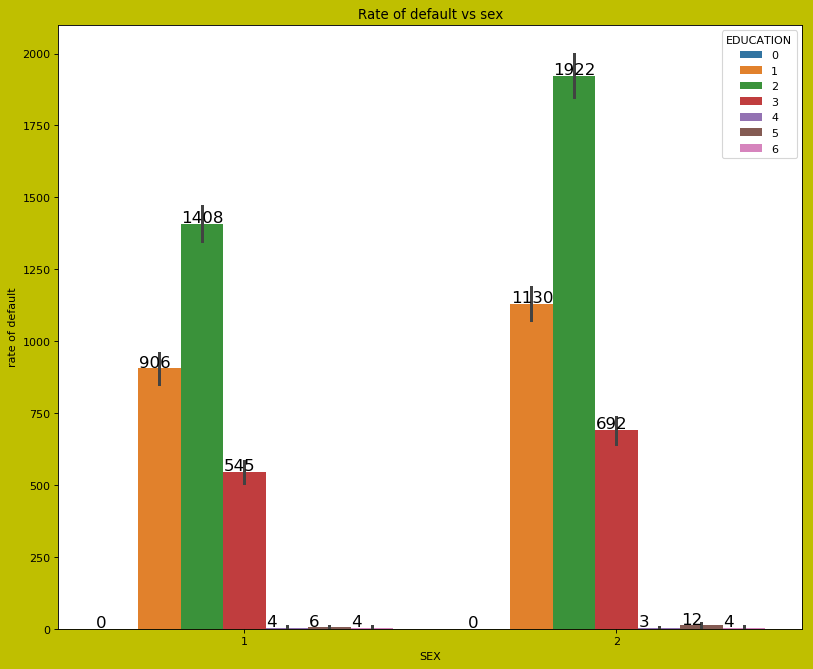

In [4]:
plt.figure(figsize=(12,10),dpi=80,facecolor='y',edgecolor='k')
ax=sns.barplot(x='SEX', y='defaulted', hue='EDUCATION',data=fraud, estimator=np.sum)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.002, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Rate of default vs sex")
plt.ylabel("rate of default")
plt.show()

In [5]:
#df['Age_group']=pd.cut(df['AGE'],bins=[20,30,45,60,90],labels=["Adults","Grown_ups","old","Sr_citizen"])

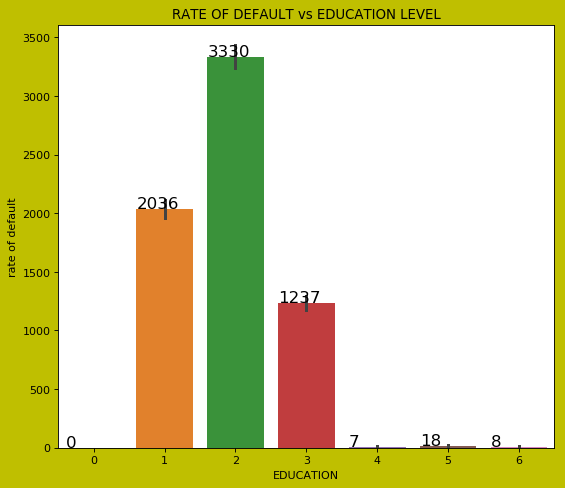

In [6]:
plt.figure(figsize=(8,7),dpi=80,facecolor='y',edgecolor='k')
ax_1=sns.barplot(x='EDUCATION', y='defaulted',data=fraud, estimator=np.sum)
# set individual bar lables using above list
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()+.002, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("RATE OF DEFAULT vs EDUCATION LEVEL")
plt.ylabel("rate of default")
plt.show()

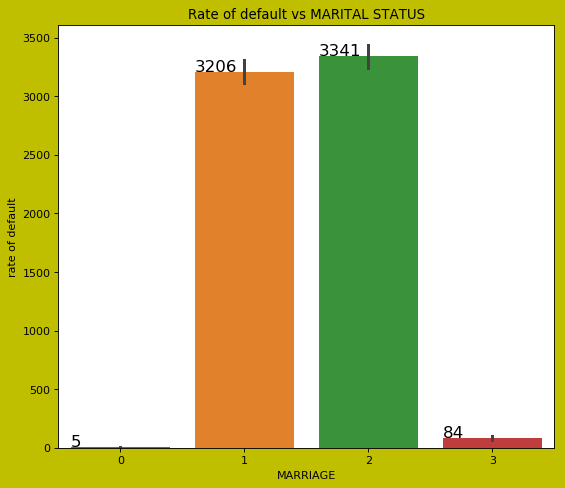

In [7]:
plt.figure(figsize=(8,7),dpi=80,facecolor='y',edgecolor='k')
ax_1=sns.barplot(x='MARRIAGE', y='defaulted',data=fraud, estimator=np.sum)
# set individual bar lables using above list
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()+.002, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.title("Rate of default vs MARITAL STATUS")
plt.ylabel("rate of default")
plt.show()

In [8]:
correl=fraud.corr()

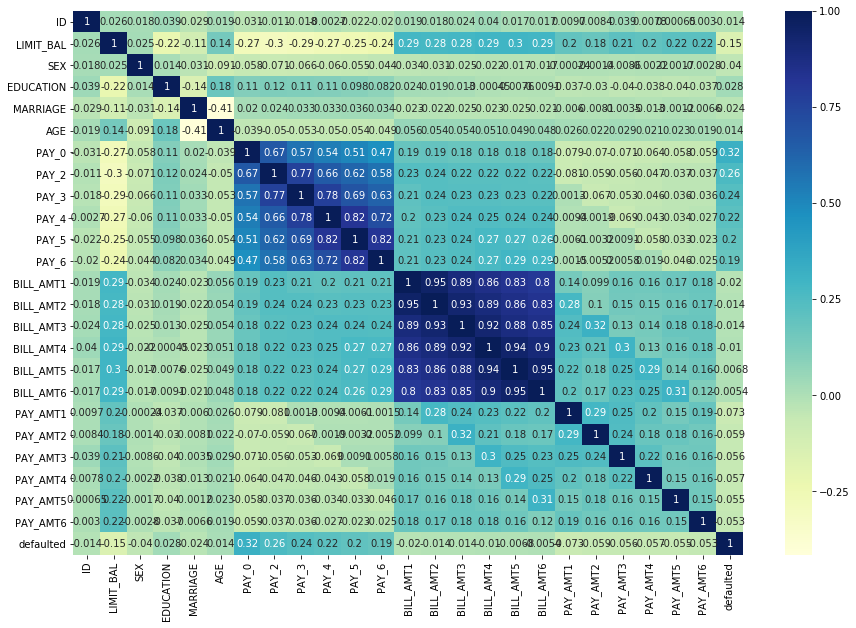

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(correl,cmap='YlGnBu',annot=True)
plt.show()

In [10]:
fraud.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [12]:
fraud.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [13]:
fraud = fraud.dropna(axis = 0, how ='any')

In [14]:
cols=fraud.columns
fraud[cols]=fraud[cols].apply(pd.to_numeric,errors='coerce')

In [15]:
 fraud.astype('float64').dtypes

ID           float64
LIMIT_BAL    float64
SEX          float64
EDUCATION    float64
MARRIAGE     float64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
defaulted    float64
dtype: object

<hr>

### Data Preparation and Model Building

In [16]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [17]:
# Putting feature variable to X
X = fraud.drop('defaulted',axis=1)

# Putting response variable to y
y = fraud['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [18]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [19]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# Making predictions
predictions = rfc.predict(X_test)

In [21]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [22]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7058
           1       0.60      0.31      0.41      1942

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [23]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6654  404]
 [1336  606]]


In [24]:
print(accuracy_score(y_test,predictions))

0.8066666666666666


## So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [25]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                        verbose = 1,
                        n_jobs=-1,
                    return_train_score=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.306779,0.022154,0.015759,0.003115,2,{'max_depth': 2},0.796239,0.810714,0.797381,0.797143,...,0.799952,0.005420,4,0.796893,0.805417,0.796071,0.801905,0.800012,0.800059,0.003407
1,0.716881,0.019414,0.021543,0.007585,7,{'max_depth': 7},0.816948,0.821667,0.816190,0.814762,...,0.816143,0.003407,1,0.833026,0.828631,0.828929,0.830655,0.830784,0.830405,0.001575
2,1.037625,0.060798,0.025931,0.008053,12,{'max_depth': 12},0.811235,0.808810,0.816667,0.811190,...,0.810905,0.003351,2,0.876838,0.881488,0.881607,0.880000,0.878043,0.879595,0.001887
3,1.137505,0.217840,0.018756,0.003819,17,{'max_depth': 17},0.805999,0.808095,0.809286,0.801905,...,0.806333,0.002512,3,0.927674,0.922976,0.925476,0.932798,0.926314,0.927048,0.003257


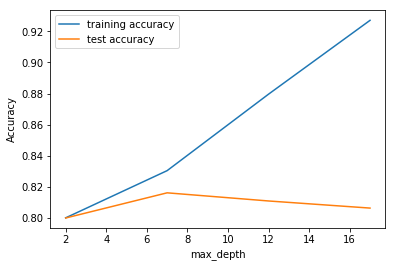

In [27]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [28]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                          verbose =1,
                             n_jobs=-1,
                             return_train_score=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.669097,0.142251,0.084274,0.007082,100,{'n_estimators': 100},0.810045,0.814524,0.810714,0.804524,...,0.809000,0.003717,4,0.810167,0.811369,0.812738,0.812202,0.812928,0.811881,0.001013
1,14.692652,0.334540,0.371113,0.011416,500,{'n_estimators': 500},0.811235,0.813810,0.810952,0.806190,...,0.810000,0.002692,1,0.811596,0.810179,0.811667,0.813274,0.812035,0.811750,0.000990
2,27.145416,1.941868,0.846665,0.063511,900,{'n_estimators': 900},0.810759,0.814048,0.811667,0.805476,...,0.809905,0.003035,2,0.810882,0.810060,0.812500,0.811964,0.812868,0.811655,0.001042
3,42.975784,3.443347,1.243963,0.603166,1300,{'n_estimators': 1300},0.811473,0.813571,0.811190,0.805476,...,0.809810,0.002957,3,0.811060,0.810298,0.811548,0.812262,0.812452,0.811524,0.000791


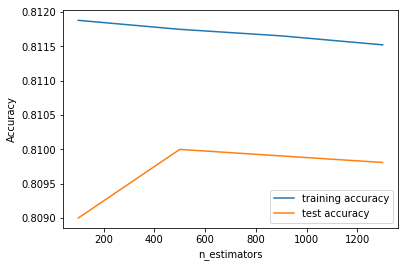

In [30]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [31]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 verbose=1,
                 n_jobs=-1,
                 return_train_score= True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [32]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.355168,0.016817,0.012659,0.001295,4,{'max_features': 4},0.814806,0.814762,0.805952,0.813095,...,0.811524,0.003497,5,0.814334,0.811786,0.806667,0.821369,0.812392,0.813310,0.004760
1,0.633772,0.012638,0.013910,0.001796,8,{'max_features': 8},0.817424,0.820952,0.820000,0.816190,...,0.818286,0.001855,3,0.820763,0.821369,0.819940,0.821131,0.821201,0.820881,0.000510
2,1.076420,0.048455,0.012180,0.000831,14,{'max_features': 14},0.819329,0.819286,0.820714,0.815000,...,0.818429,0.001944,2,0.821954,0.820714,0.820952,0.821667,0.820784,0.821214,0.000501
3,1.386687,0.018777,0.015598,0.004918,20,{'max_features': 20},0.818853,0.821190,0.819048,0.814286,...,0.818143,0.002286,4,0.822489,0.820774,0.821845,0.821250,0.822630,0.821798,0.000710
4,1.650608,0.015711,0.012365,0.001177,24,{'max_features': 24},0.817662,0.820952,0.819762,0.815238,...,0.818619,0.001992,1,0.823442,0.821667,0.822738,0.822738,0.822987,0.822714,0.000583


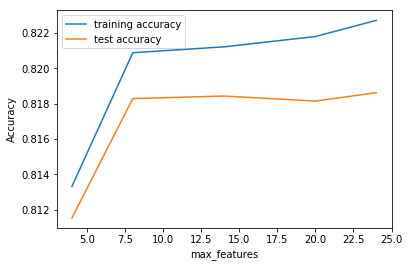

In [33]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [34]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 verbose=1,
                 n_jobs = -1,
                 return_train_score = True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.745326,0.032634,0.026322,0.012940,100,{'min_samples_leaf': 100},0.814568,0.815238,0.816905,0.814524,...,0.813905,0.002938,1,0.816180,0.815238,0.816131,0.820298,0.815606,0.816690,0.001837
1,0.626460,0.020470,0.017376,0.002453,150,{'min_samples_leaf': 150},0.811711,0.810476,0.817619,0.800000,...,0.809952,0.005678,2,0.811060,0.810833,0.812917,0.808393,0.815844,0.811809,0.002478
2,0.578251,0.037156,0.018306,0.002928,200,{'min_samples_leaf': 200},0.808379,0.807619,0.810952,0.800000,...,0.807667,0.004096,3,0.810405,0.808810,0.811667,0.808929,0.816975,0.811357,0.002998
3,0.531917,0.024278,0.016028,0.003173,250,{'min_samples_leaf': 250},0.808617,0.815476,0.805714,0.796190,...,0.806571,0.006198,5,0.806477,0.810595,0.803631,0.805119,0.808226,0.806810,0.002425
4,0.489928,0.023884,0.014109,0.000829,300,{'min_samples_leaf': 300},0.812188,0.809286,0.804048,0.800000,...,0.806667,0.004242,4,0.808203,0.805833,0.799881,0.809464,0.813404,0.807357,0.004471


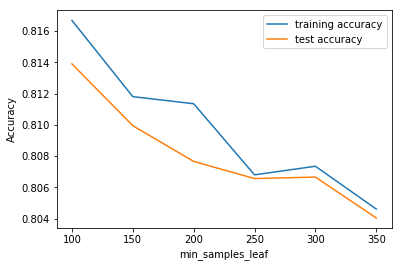

In [36]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [37]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 verbose=1,
                 n_jobs = -1,
                 return_train_score = True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [38]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.977218,0.024296,0.019514,0.003598,200,{'min_samples_split': 200},0.817662,0.819762,0.822619,0.815952,...,0.818333,0.002593,1,0.824097,0.824940,0.821607,0.824940,0.825368,0.824190,0.001356
1,0.895108,0.019301,0.019256,0.003058,250,{'min_samples_split': 250},0.816710,0.820952,0.816667,0.815476,...,0.817238,0.001910,2,0.821597,0.822500,0.821131,0.823631,0.822511,0.822274,0.000862
2,0.841617,0.008012,0.018176,0.001112,300,{'min_samples_split': 300},0.817900,0.818810,0.819286,0.812857,...,0.816714,0.002501,5,0.823144,0.819464,0.822262,0.820833,0.821201,0.821381,0.001256
3,0.805144,0.030354,0.018777,0.003756,350,{'min_samples_split': 350},0.816948,0.821429,0.818333,0.810714,...,0.816762,0.003493,4,0.820168,0.819107,0.819286,0.820179,0.820308,0.819810,0.000506
4,0.780667,0.027270,0.019923,0.004845,400,{'min_samples_split': 400},0.816710,0.820714,0.821429,0.813571,...,0.816905,0.003721,3,0.818739,0.818869,0.820298,0.818988,0.818106,0.819000,0.000717


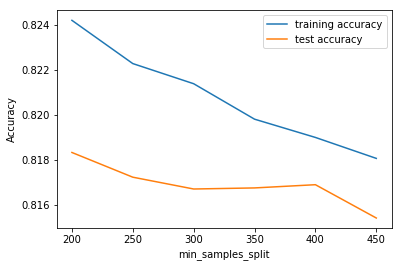

In [39]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [40]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [41]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [42]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8183809523809524 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [43]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [44]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# predict
predictions = rfc.predict(X_test)

## MODEL EVALUATION

In [46]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [48]:
print(confusion_matrix(y_test,predictions))

[[6753  305]
 [1252  690]]


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print(accuracy_score(y_test,predictions))

0.827


In [51]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score,precision_score


In [52]:
print(precision_score(y_test,predictions))

0.6934673366834171


In [53]:
print(recall_score(y_test,predictions))

0.3553038105046344


## IMPORTANT FEATURES

In [54]:
importances = rfc.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.494466,PAY_0
1,0.191002,PAY_2
2,0.093434,PAY_3
3,0.058879,PAY_4
4,0.036002,PAY_5
5,0.026844,PAY_6
6,0.019204,PAY_AMT1
7,0.016473,PAY_AMT3
8,0.015734,PAY_AMT2
9,0.009555,LIMIT_BAL


<Figure size 1440x216 with 0 Axes>

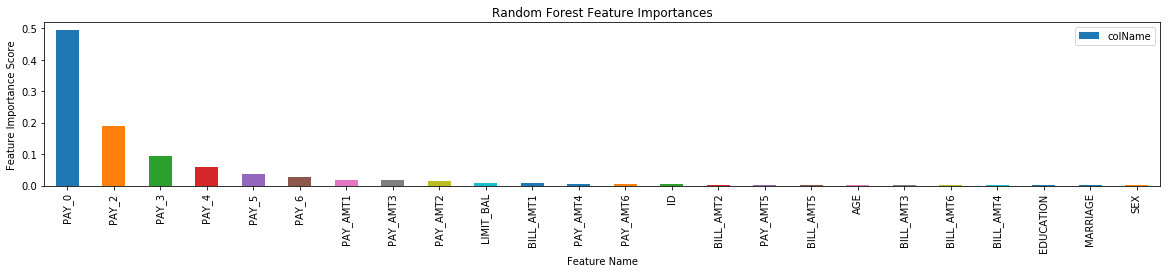

In [56]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='value', y='colName' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()